# Experiment with four models 

###  Read clean data

In [3]:
import pandas as pd

# Specify the path to your CSV file
file_path = 'Group_2_clean_Data..csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

df.head()


,communityname,State,countyCode,communityCode,fold,pop,perHoush,pctBlack,pctWhite,pctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,violentPerPop,nonViolPerPop
0,149.0,28.0,55.0,509.0,1.0,11980.0,3.10,1.37,91.78,6.50,...,14.1,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
1,1034.0,35.0,58.0,424.0,1.0,23123.0,2.82,0.80,95.57,3.44,...,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
2,1780.0,34.0,114.0,959.0,1.0,29344.0,2.43,0.74,94.33,3.43,...,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51
3,664.0,31.0,53.0,213.0,1.0,16656.0,2.40,1.70,97.35,0.50,...,225.0,1301.78,716.0,4142.56,47.0,271.93,5.0,21.08,306.64,4425.45
4,140.0,22.0,82.0,471.0,1.0,11245.0,2.76,0.53,89.16,1.17,...,91.0,728.93,1060.0,8490.87,91.0,728.93,5.0,40.05,374.06,9988.79


In [4]:
# Assuming `df` is your DataFrame:
df_feature = df.iloc[:, 5:-18]  # Select all rows and columns from index 5 to the 18th-to-last
df_target = df['burglaries']  # Select the 'violentPerPop' column as the target variable


df_feature.head(5)


,pop,perHoush,pctBlack,pctWhite,pctAsian,pctHisp,pct12-21,pct12-29,pct16-24,pct65up,...,persHomeless,pctForeignBorn,pctBornStateResid,pctSameHouse-5,pctSameCounty-5,pctSameState-5,landArea,popDensity,pctUsePubTrans,pctOfficDrugUnit
0,11980.0,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,...,0.1,10.66,53.72,65.29,78.09,89.14,13.7,1845.9,9.63,0.2
1,23123.0,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,...,0.0,8.30,77.17,71.27,90.22,96.12,10.6,2186.7,3.84,0.0
2,29344.0,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,...,0.0,5.00,44.77,36.60,61.26,82.85,10.6,2780.9,4.37,0.0
3,16656.0,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,17.57,...,0.0,2.04,88.71,56.70,90.17,96.24,5.2,3217.7,3.31,0.0
4,11245.0,2.76,0.53,89.16,1.17,0.52,24.46,40.53,28.69,12.65,...,0.0,1.74,73.75,42.22,60.34,89.02,11.5,974.2,0.38,0.0


 # 1 Random foreset model

###  1.1 without feature selection

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    df_feature, df_target, test_size=0.2, random_state=42
)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Predict on the training set
y_train_pred = rf_model.predict(X_train)

# Calculate metrics for both train and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Print the results
print(f"Training Set Metrics:")
print(f"  - Mean Squared Error: {train_mse:.2f}")
print(f"  - R-squared: {train_r2:.2f}")

print(f"Testing Set Metrics:")
print(f"  - Mean Squared Error: {mse:.2f}")
print(f"  - R-squared: {r2:.2f}")


Training Set Metrics:
  - Mean Squared Error: 515588.70
  - R-squared: 0.95
Testing Set Metrics:
  - Mean Squared Error: 232487.27
  - R-squared: 0.91


### 1.2 select 40 top important features

In [4]:

# Step 1: Select top 40 features based on importance
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": df_feature.columns,
    "Importance": feature_importances
})
sorted_features = feature_importance_df.sort_values(by="Importance", ascending=False)
top_40_features = sorted_features.head(40)

# Step 2: Create reduced datasets with the top 40 features
X_train_top40 = X_train[top_40_features["Feature"]]
X_test_top40 = X_test[top_40_features["Feature"]]

# Step 3: Train a new Random Forest model on the reduced dataset
rf_model_top40 = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model_top40.fit(X_train_top40, y_train)

# Step 4: Predict on both training and testing sets
y_train_pred_top40 = rf_model_top40.predict(X_train_top40)
y_test_pred_top40 = rf_model_top40.predict(X_test_top40)

# Step 5: Evaluate the model performance
train_mse_top40 = mean_squared_error(y_train, y_train_pred_top40)
train_r2_top40 = r2_score(y_train, y_train_pred_top40)

test_mse_top40 = mean_squared_error(y_test, y_test_pred_top40)
test_r2_top40 = r2_score(y_test, y_test_pred_top40)

# Print the results
print(f"Using Top 40 Features:")
print(f"Training Set Metrics:")
print(f"  - Mean Squared Error: {train_mse_top40:.2f}")
print(f"  - R-squared: {train_r2_top40:.2f}")

print(f"Testing Set Metrics:")
print(f"  - Mean Squared Error: {test_mse_top40:.2f}")
print(f"  - R-squared: {test_r2_top40:.2f}")


Using Top 40 Features:
Training Set Metrics:
  - Mean Squared Error: 468989.46
  - R-squared: 0.96
Testing Set Metrics:
  - Mean Squared Error: 194441.16
  - R-squared: 0.93


### 1.3 Hyperparameter tuning

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Select the top 40 features (assuming you already have 'top_40_features')
X_train_top40 = X_train[top_40_features["Feature"]]
X_test_top40 = X_test[top_40_features["Feature"]]

# Step 2: Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [2, 5, 10, 20],       # Maximum depth of the tree
    'min_samples_split': [5, 10], # Minimum samples required to split an internal node
    'min_samples_leaf': [2, 5],   # Minimum samples required at each leaf node
}

# Step 3: Initialize the Random Forest Regressor
rf_model_top40 = RandomForestRegressor(random_state=42)

# Step 4: Initialize GridSearchCV
grid_search_top40 = GridSearchCV(
    estimator=rf_model_top40, 
    param_grid=param_grid, 
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Negative MSE as scoring metric
    verbose=1,
    n_jobs=-1  # Use all processors
)

# Step 5: Perform grid search to find the best parameters
grid_search_top40.fit(X_train_top40, y_train)

# Step 6: Retrieve the best model
best_rf_model_top40 = grid_search_top40.best_estimator_

# Step 7: Predict on the test set
y_pred_top40 = best_rf_model_top40.predict(X_test_top40)

# Step 8: Evaluate the model
test_mse_top40 = mean_squared_error(y_test, y_pred_top40)
test_r2_top40 = r2_score(y_test, y_pred_top40)

# Predict on the training set
y_train_pred_top40 = best_rf_model_top40.predict(X_train_top40)

# Calculate metrics for both train and test sets
train_mse_top40 = mean_squared_error(y_train, y_train_pred_top40)
train_r2_top40 = r2_score(y_train, y_train_pred_top40)

# Step 9: Print the results
print(f"Best Hyperparameters (Top 40 Features): {grid_search_top40.best_params_}")
print(f"Training Set Metrics (Top 40 Features):")
print(f"  - Mean Squared Error: {train_mse_top40:.2f}")
print(f"  - R-squared: {train_r2_top40:.2f}")

print(f"Testing Set Metrics (Top 40 Features):")
print(f"  - Mean Squared Error: {test_mse_top40:.2f}")
print(f"  - R-squared: {test_r2_top40:.2f}")


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Hyperparameters (Top 40 Features): {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Training Set Metrics (Top 40 Features):
  - Mean Squared Error: 1177860.33
  - R-squared: 0.90
Testing Set Metrics (Top 40 Features):
  - Mean Squared Error: 224159.18
  - R-squared: 0.91


In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    df_feature, df_target, test_size=0.2, random_state=42
)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100],            # Number of trees in the forest
    'max_depth': [5, 10, 20],           # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],           # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 5],             # Minimum samples required at each leaf node
                # Whether to bootstrap samples
}

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model, 
    param_grid=param_grid, 
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1  # Use all processors
)

# Perform grid search to find the best parameters
grid_search.fit(X_train, y_train)

# Retrieve the best model
best_rf_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Predict on the training set
y_train_pred = best_rf_model.predict(X_train)

# Calculate metrics for both train and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Print the results
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Training Set Metrics:")
print(f"  - Mean Squared Error: {train_mse:.2f}")
print(f"  - R-squared: {train_r2:.2f}")

print(f"Testing Set Metrics:")
print(f"  - Mean Squared Error: {mse:.2f}")
print(f"  - R-squared: {r2:.2f}")


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training Set Metrics:
  - Mean Squared Error: 583407.60
  - R-squared: 0.95
Testing Set Metrics:
  - Mean Squared Error: 253211.20
  - R-squared: 0.90


# 2. SVR method

## 2.1 Without feature selection

In [17]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 1: Train-Test Split (No Feature Selection)
X_train, X_test, y_train, y_test = train_test_split(
    df_feature, df_target, test_size=0.2, random_state=42
)

# Step 2: Feature and Target Scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Scale features
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scale target variable
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

# Step 3: Train the SVR Model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train_scaled)

# Step 4: Predict and Evaluate
y_train_pred_scaled = svr_model.predict(X_train_scaled)
y_pred_scaled = svr_model.predict(X_test_scaled)

# Inverse-transform predictions and target back to original scale
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).ravel()
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).ravel()

# Calculate metrics for the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for the testing set
test_mse = mean_squared_error(y_test_original, y_pred)
test_r2 = r2_score(y_test_original, y_pred)

# Print the results
print(f"Training Set Metrics using Scaled Features and Target without Feature Selection:")
print(f"  - Mean Squared Error: {train_mse:.2f}")
print(f"  - R-squared: {train_r2:.2f}")

print(f"\nTesting Set Metrics using Scaled Features and Target without Feature Selection:")
print(f"  - Mean Squared Error: {test_mse:.2f}")
print(f"  - R-squared: {test_r2:.2f}")


Training Set Metrics using Scaled Features and Target without Feature Selection:
  - Mean Squared Error: 7671441.42
  - R-squared: 0.33

Testing Set Metrics using Scaled Features and Target without Feature Selection:
  - Mean Squared Error: 281643.38
  - R-squared: 0.89


## 2.2  Applying Lasso feature selection

In [18]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 1: Train-Test Split (No Feature Selection)
X_train, X_test, y_train, y_test = train_test_split(
    df_feature, df_target, test_size=0.2, random_state=42
)

# Step 2: Lasso for Feature Selection
lasso = Lasso(alpha=0.1, random_state=42)  # Adjust alpha as needed
lasso.fit(X_train, y_train)

# Select features with non-zero coefficients
selected_features = X_train.columns[np.abs(lasso.coef_) > 1e-4]
print(f"Selected Features by Lasso: {list(selected_features)}")

# Subset the dataset with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Step 3: Feature and Target Scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Scale features
X_train_scaled = scaler_X.fit_transform(X_train_selected)
X_test_scaled = scaler_X.transform(X_test_selected)

# Scale target variable
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

# Step 4: Train the SVR Model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train_scaled)

# Step 5: Predict and Evaluate
y_train_pred_scaled = svr_model.predict(X_train_scaled)  # Predictions on training data
y_pred_scaled = svr_model.predict(X_test_scaled)        # Predictions on testing data

# Inverse-transform predictions and target back to original scale
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).ravel()
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).ravel()

# Calculate metrics for the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for the testing set
test_mse = mean_squared_error(y_test_original, y_pred)
test_r2 = r2_score(y_test_original, y_pred)

# Print the results
print(f"Training Set Metrics using Lasso-Selected Features and SVR:")
print(f"  - Mean Squared Error: {train_mse:.2f}")
print(f"  - R-squared: {train_r2:.2f}")

print(f"\nTesting Set Metrics using Lasso-Selected Features and SVR:")
print(f"  - Mean Squared Error: {test_mse:.2f}")
print(f"  - R-squared: {test_r2:.2f}")


Selected Features by Lasso: ['pop', 'perHoush', 'pctBlack', 'pctWhite', 'pctAsian', 'pctHisp', 'pct12-21', 'pct12-29', 'pct16-24', 'pct65up', 'persUrban', 'pctUrban', 'medIncome', 'pctWwage', 'pctWfarm', 'pctWdiv', 'pctWsocsec', 'pctPubAsst', 'pctRetire', 'medFamIncome', 'perCapInc', 'whitePerCap', 'blackPerCap', 'NAperCap', 'asianPerCap', 'otherPerCap', 'hispPerCap', 'persPoverty', 'pctPoverty', 'pctLowEdu', 'pctNotHSgrad', 'pctCollGrad', 'pctUnemploy', 'pctEmploy', 'pctEmployMfg', 'pctEmployProfServ', 'pctOccupManu', 'pctOccupMgmt', 'pctMaleDivorc', 'pctMaleNevMar', 'pctFemDivorc', 'pctAllDivorc', 'persPerFam', 'pct2Par', 'pctKids2Par', 'pctKids-4w2Par', 'pct12-17w2Par', 'pctWorkMom-6', 'pctWorkMom-18', 'kidsBornNevrMarr', 'pctKidsBornNevrMarr', 'numForeignBorn', 'pctFgnImmig-3', 'pctFgnImmig-5', 'pctFgnImmig-8', 'pctFgnImmig-10', 'pctImmig-3', 'pctImmig-5', 'pctImmig-8', 'pctImmig-10', 'pctSpeakOnlyEng', 'pctNotSpeakEng', 'pctLargHousFam', 'pctLargHous', 'persPerOccupHous', 'persPer

C:\Users\hyz20\miniconda3\envs\gpu-env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.938e+08, tolerance: 2.023e+06
  model = cd_fast.enet_coordinate_descent(


## 2.3 hyperparatmer tuning for SVR

In [19]:
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    df_feature, df_target, test_size=0.2, random_state=42
)

# Step 2: Lasso for Feature Selection
lasso = Lasso(alpha=0.01, random_state=42)  # Adjust alpha as needed
lasso.fit(X_train, y_train)

# Select features with non-zero coefficients
selected_features = X_train.columns[np.abs(lasso.coef_) > 1e-4]
print(f"Selected Features by Lasso: {list(selected_features)}")

# Subset the dataset with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Step 3: Feature Scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Scale features
X_train_scaled = scaler_X.fit_transform(X_train_selected)
X_test_scaled = scaler_X.transform(X_test_selected)

# Scale target variable
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

# Step 4: Define the parameter grid for SVR
param_grid = {
    'C': [1, 10, 100],         # Regularization parameter
    'epsilon': [0.01, 0.1, 1], # Epsilon in the loss function
    'kernel': ['rbf']          # Radial Basis Function kernel
}

# Step 5: Hyperparameter Tuning using GridSearchCV
svr_model = SVR()
grid_search = GridSearchCV(
    estimator=svr_model, 
    param_grid=param_grid, 
    scoring='neg_mean_squared_error', 
    cv=5,  # 5-fold cross-validation for efficiency
    verbose=1,
    n_jobs=-1  # Use all available processors
)
grid_search.fit(X_train_scaled, y_train_scaled)

# Retrieve the best model and parameters
best_svr_model = grid_search.best_estimator_
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Step 6: Predict and Evaluate
y_train_pred_scaled = best_svr_model.predict(X_train_scaled)  # Predictions on training data
y_pred_scaled = best_svr_model.predict(X_test_scaled)        # Predictions on testing data

# Inverse-transform predictions and target back to original scale
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).ravel()
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).ravel()

# Calculate metrics for the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for the testing set
test_mse = mean_squared_error(y_test_original, y_pred)
test_r2 = r2_score(y_test_original, y_pred)

# Print the results
print(f"Training Set Metrics using Lasso-Selected Features and Tuned SVR:")
print(f"  - Mean Squared Error: {train_mse:.2f}")
print(f"  - R-squared: {train_r2:.2f}")

print(f"\nTesting Set Metrics using Lasso-Selected Features and Tuned SVR:")
print(f"  - Mean Squared Error: {test_mse:.2f}")
print(f"  - R-squared: {test_r2:.2f}")


C:\Users\hyz20\miniconda3\envs\gpu-env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.931e+08, tolerance: 2.023e+06
  model = cd_fast.enet_coordinate_descent(


Selected Features by Lasso: ['pop', 'perHoush', 'pctBlack', 'pctWhite', 'pctAsian', 'pctHisp', 'pct12-21', 'pct12-29', 'pct16-24', 'pct65up', 'persUrban', 'pctUrban', 'medIncome', 'pctWwage', 'pctWfarm', 'pctWdiv', 'pctWsocsec', 'pctPubAsst', 'pctRetire', 'medFamIncome', 'perCapInc', 'whitePerCap', 'blackPerCap', 'NAperCap', 'asianPerCap', 'otherPerCap', 'hispPerCap', 'persPoverty', 'pctPoverty', 'pctLowEdu', 'pctNotHSgrad', 'pctCollGrad', 'pctUnemploy', 'pctEmploy', 'pctEmployMfg', 'pctEmployProfServ', 'pctOccupManu', 'pctOccupMgmt', 'pctMaleDivorc', 'pctMaleNevMar', 'pctFemDivorc', 'pctAllDivorc', 'persPerFam', 'pct2Par', 'pctKids2Par', 'pctKids-4w2Par', 'pct12-17w2Par', 'pctWorkMom-6', 'pctWorkMom-18', 'kidsBornNevrMarr', 'pctKidsBornNevrMarr', 'numForeignBorn', 'pctFgnImmig-3', 'pctFgnImmig-5', 'pctFgnImmig-8', 'pctFgnImmig-10', 'pctImmig-3', 'pctImmig-5', 'pctImmig-8', 'pctImmig-10', 'pctSpeakOnlyEng', 'pctNotSpeakEng', 'pctLargHousFam', 'pctLargHous', 'persPerOccupHous', 'persPer

## 3 KNN model

## 3.1 without select feature

In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    df_feature, df_target, test_size=0.2, random_state=42
)

# Step 2: Feature Scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Scale features
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scale target variable
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

# Inverse-transform the scaled target variables to original scale
y_train_original = scaler_y.inverse_transform(y_train_scaled.reshape(-1, 1)).ravel()
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).ravel()

# Step 3: Train KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5, weights='uniform', metric='euclidean')  # Default parameters
knn_model.fit(X_train_scaled, y_train_scaled)

# Step 4: Predict and Evaluate
y_pred_scaled = knn_model.predict(X_test_scaled)

# Inverse-transform predictions and target back to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Calculate metrics on the original scale
test_mse = mean_squared_error(y_test_original, y_pred)
test_r2 = r2_score(y_test_original, y_pred)

# Predict for training data and calculate training metrics
y_train_pred_scaled = knn_model.predict(X_train_scaled)
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).ravel()

# Calculate training MSE and R-squared
train_mse = mean_squared_error(y_train_original, y_train_pred)
train_r2 = r2_score(y_train_original, y_train_pred)

# Print the results
print(f"KNN Regressor Results without Feature Selection or Hyperparameter Tuning:")
print(f"  - Training Mean Squared Error: {train_mse:.2f}")
print(f"  - Training R-squared: {train_r2:.2f}")
print(f"  - Testing Mean Squared Error: {test_mse:.2f}")
print(f"  - Testing R-squared: {test_r2:.2f}")


KNN Regressor Results without Feature Selection or Hyperparameter Tuning:
  - Training Mean Squared Error: 2437784.33
  - Training R-squared: 0.79
  - Testing Mean Squared Error: 486828.85
  - Testing R-squared: 0.81


## 3.2 select feature with lasso

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    df_feature, df_target, test_size=0.2, random_state=42
)

# Step 2: Lasso for Feature Selection
lasso = Lasso(alpha=1, random_state=42)  # Adjust alpha as needed
lasso.fit(X_train, y_train)

# Select features with non-zero coefficients
selected_features = X_train.columns[np.abs(lasso.coef_) > 1e-4]
print(f"Selected Features by Lasso: {list(selected_features)}")

# Subset the dataset with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Step 3: Feature Scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Scale features
X_train_scaled = scaler_X.fit_transform(X_train_selected)
X_test_scaled = scaler_X.transform(X_test_selected)

# Scale target variable
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

# Step 4: Train KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5, weights='uniform', metric='euclidean')  # Default parameters
knn_model.fit(X_train_scaled, y_train_scaled)

# Step 5: Predict and Evaluate
# Predict on the test set
y_pred_scaled = knn_model.predict(X_test_scaled)

# Inverse-transform predictions and target back to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).ravel()

# Calculate test set metrics
test_mse = mean_squared_error(y_test_original, y_pred)
test_r2 = r2_score(y_test_original, y_pred)

# Predict on the training set for training metrics
y_train_pred_scaled = knn_model.predict(X_train_scaled)
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).ravel()
y_train_original = scaler_y.inverse_transform(y_train_scaled.reshape(-1, 1)).ravel()

# Calculate training set metrics
train_mse = mean_squared_error(y_train_original, y_train_pred)
train_r2 = r2_score(y_train_original, y_train_pred)

# Print the results
print(f"KNN Regressor Results with Lasso-Selected Features:")
print(f"  - Training Mean Squared Error: {train_mse:.2f}")
print(f"  - Training R-squared: {train_r2:.2f}")
print(f"  - Testing Mean Squared Error: {test_mse:.2f}")
print(f"  - Testing R-squared: {test_r2:.2f}")


Selected Features by Lasso: ['pop', 'pctBlack', 'pctWhite', 'pctAsian', 'pctHisp', 'pct12-29', 'pct16-24', 'pct65up', 'persUrban', 'pctUrban', 'medIncome', 'pctWfarm', 'pctWdiv', 'pctWsocsec', 'pctPubAsst', 'pctRetire', 'medFamIncome', 'perCapInc', 'whitePerCap', 'blackPerCap', 'NAperCap', 'asianPerCap', 'otherPerCap', 'hispPerCap', 'persPoverty', 'pctPoverty', 'pctLowEdu', 'pctNotHSgrad', 'pctCollGrad', 'pctUnemploy', 'pctEmploy', 'pctEmployMfg', 'pctEmployProfServ', 'pctOccupManu', 'pctOccupMgmt', 'pctMaleDivorc', 'pctMaleNevMar', 'pctFemDivorc', 'pct2Par', 'pctKids-4w2Par', 'pct12-17w2Par', 'pctWorkMom-6', 'pctWorkMom-18', 'kidsBornNevrMarr', 'pctKidsBornNevrMarr', 'numForeignBorn', 'pctFgnImmig-3', 'pctFgnImmig-5', 'pctFgnImmig-8', 'pctFgnImmig-10', 'pctImmig-3', 'pctImmig-5', 'pctImmig-8', 'pctImmig-10', 'pctSpeakOnlyEng', 'pctNotSpeakEng', 'pctLargHousFam', 'pctLargHous', 'persPerOwnOccup', 'pctPersOwnOccup', 'pctPopDenseHous', 'pctSmallHousUnits', 'medNumBedrm', 'houseVacant', '

C:\Users\hyz20\miniconda3\envs\gpu-env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.969e+08, tolerance: 2.023e+06
  model = cd_fast.enet_coordinate_descent(


## 3.3  hyperparmeter tuning for KNN

In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint
import numpy as np

# Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    df_feature, df_target, test_size=0.2, random_state=42
)

# Step 2: Lasso for Feature Selection
lasso = Lasso(alpha=1, random_state=42)  # Adjust alpha as needed
lasso.fit(X_train, y_train)

# Select features with non-zero coefficients
selected_features = X_train.columns[np.abs(lasso.coef_) > 1e-4]
print(f"Selected Features by Lasso: {list(selected_features)}")

# Subset the dataset with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Step 3: Feature Scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Scale features
X_train_scaled = scaler_X.fit_transform(X_train_selected)
X_test_scaled = scaler_X.transform(X_test_selected)

# Scale target variable
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

# Step 4: Hyperparameter Tuning with RandomizedSearchCV
param_distributions = {
    'n_neighbors': randint(4, 10),  # Randomly sample number of neighbors between 4 and 10
    'weights': ['uniform', 'distance'],  # Weighting method
    'metric': ['euclidean', 'manhattan']  # Distance metrics
}

knn_model = KNeighborsRegressor()

random_search = RandomizedSearchCV(
    estimator=knn_model,
    param_distributions=param_distributions,
    n_iter=20,  # Number of parameter combinations to sample
    scoring='neg_mean_squared_error',  # Optimize for MSE
    cv=5,  # 5-fold cross-validation
    verbose=1,
    random_state=42,  # Ensure reproducibility
    n_jobs=-1  # Use all available processors
)

random_search.fit(X_train_scaled, y_train_scaled)

# Retrieve the best model and parameters
best_knn_model = random_search.best_estimator_
print(f"Best Hyperparameters: {random_search.best_params_}")

# Step 5: Predict and Evaluate
# Predict on the test set
y_pred_scaled = best_knn_model.predict(X_test_scaled)

# Inverse-transform predictions and target back to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).ravel()

# Calculate test set metrics
test_mse = mean_squared_error(y_test_original, y_pred)
test_r2 = r2_score(y_test_original, y_pred)

# Predict on the training set for training metrics
y_train_pred_scaled = best_knn_model.predict(X_train_scaled)
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).ravel()

# Calculate training set metrics
train_mse = mean_squared_error(y_train_original, y_train_pred)
train_r2 = r2_score(y_train_original, y_train_pred)

# Print the results
print(f"KNN Regressor Results with Lasso-Selected Features and Hyperparameter Tuning (RandomizedSearchCV):")
print(f"  - Training Mean Squared Error: {train_mse:.2f}")
print(f"  - Training R-squared: {train_r2:.2f}")
print(f"  - Testing Mean Squared Error: {test_mse:.2f}")
print(f"  - Testing R-squared: {test_r2:.2f}")


C:\Users\hyz20\miniconda3\envs\gpu-env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.969e+08, tolerance: 2.023e+06
  model = cd_fast.enet_coordinate_descent(


Selected Features by Lasso: ['pop', 'pctBlack', 'pctWhite', 'pctAsian', 'pctHisp', 'pct12-29', 'pct16-24', 'pct65up', 'persUrban', 'pctUrban', 'medIncome', 'pctWfarm', 'pctWdiv', 'pctWsocsec', 'pctPubAsst', 'pctRetire', 'medFamIncome', 'perCapInc', 'whitePerCap', 'blackPerCap', 'NAperCap', 'asianPerCap', 'otherPerCap', 'hispPerCap', 'persPoverty', 'pctPoverty', 'pctLowEdu', 'pctNotHSgrad', 'pctCollGrad', 'pctUnemploy', 'pctEmploy', 'pctEmployMfg', 'pctEmployProfServ', 'pctOccupManu', 'pctOccupMgmt', 'pctMaleDivorc', 'pctMaleNevMar', 'pctFemDivorc', 'pct2Par', 'pctKids-4w2Par', 'pct12-17w2Par', 'pctWorkMom-6', 'pctWorkMom-18', 'kidsBornNevrMarr', 'pctKidsBornNevrMarr', 'numForeignBorn', 'pctFgnImmig-3', 'pctFgnImmig-5', 'pctFgnImmig-8', 'pctFgnImmig-10', 'pctImmig-3', 'pctImmig-5', 'pctImmig-8', 'pctImmig-10', 'pctSpeakOnlyEng', 'pctNotSpeakEng', 'pctLargHousFam', 'pctLargHous', 'persPerOwnOccup', 'pctPersOwnOccup', 'pctPopDenseHous', 'pctSmallHousUnits', 'medNumBedrm', 'houseVacant', '

# 4 Decision tree method

## 4.1  without feature selection

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    df_feature, df_target, test_size=0.2, random_state=42
)

# Step 2: Train the DecisionTreeRegressor Model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Step 3: Predict and Evaluate
y_train_pred = tree_model.predict(X_train)  # Predictions on training data
y_test_pred = tree_model.predict(X_test)    # Predictions on testing data

# Calculate metrics for training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for testing set
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print(f"Training Set Metrics using DecisionTreeRegressor:")
print(f"  - Mean Squared Error: {train_mse:.2f}")
print(f"  - R-squared: {train_r2:.2f}")

print(f"\nTesting Set Metrics using DecisionTreeRegressor:")
print(f"  - Mean Squared Error: {test_mse:.2f}")
print(f"  - R-squared: {test_r2:.2f}")


Training Set Metrics using DecisionTreeRegressor:
  - Mean Squared Error: 0.00
  - R-squared: 1.00

Testing Set Metrics using DecisionTreeRegressor:
  - Mean Squared Error: 1092504.58
  - R-squared: 0.58


## 4.2 use feature selection selet top 40 features

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    df_feature, df_target, test_size=0.2, random_state=42
)

# Step 2: Use Random Forest for Feature Importance
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_
important_features = X_train.columns[np.argsort(feature_importances)[-40:]]  # Select top 40 features
print(f"Top 40 Important Features: {list(important_features)}")

# Subset the dataset with the top 40 features
X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]

# Step 3: Train the DecisionTreeRegressor Model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_selected, y_train)

# Step 4: Predict and Evaluate
y_train_pred = tree_model.predict(X_train_selected)  # Predictions on training data
y_test_pred = tree_model.predict(X_test_selected)    # Predictions on testing data

# Calculate metrics for training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for testing set
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print(f"Training Set Metrics using DecisionTreeRegressor with Top 40 Features:")
print(f"  - Mean Squared Error: {train_mse:.2f}")
print(f"  - R-squared: {train_r2:.2f}")

print(f"\nTesting Set Metrics using DecisionTreeRegressor with Top 40 Features:")
print(f"  - Mean Squared Error: {test_mse:.2f}")
print(f"  - R-squared: {test_r2:.2f}")


Top 40 Important Features: ['pctPubAsst', 'persPerFam', 'pctKids2Par', 'medFamIncome', 'pctNotHSgrad', 'perCapInc', 'pctWsocsec', 'pctVacant6up', 'popDensity', 'pctImmig-3', 'pct16-24', 'pctLowEdu', 'pctEmployMfg', 'whitePerCap', 'medRentpctHousInc', 'pctOccupMgmt', 'pctMaleDivorc', 'pctFgnImmig-3', 'persPerOccupHous', 'pctSameHouse-5', 'NAperCap', 'pctMaleNevMar', 'pctHousOwnerOccup', 'pctSameCounty-5', 'pctSmallHousUnits', 'pctWorkMom-6', 'pctFemDivorc', 'pctImmig-5', 'landArea', 'pctPersOwnOccup', 'pctLargHous', 'persHomeless', 'pctUsePubTrans', 'persEmergShelt', 'houseVacant', 'pop', 'kidsBornNevrMarr', 'numForeignBorn', 'persUrban', 'persPoverty']
Training Set Metrics using DecisionTreeRegressor with Top 40 Features:
  - Mean Squared Error: 0.00
  - R-squared: 1.00

Testing Set Metrics using DecisionTreeRegressor with Top 40 Features:
  - Mean Squared Error: 799246.49
  - R-squared: 0.70


## 4.3 hyperparameter tuning for decision tree method

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import numpy as np

# Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    df_feature, df_target, test_size=0.2, random_state=42
)

# Step 2: Use Random Forest for Feature Importance
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_
important_features = X_train.columns[np.argsort(feature_importances)[-40:]]  # Select top 40 features
print(f"Top 40 Important Features: {list(important_features)}")

# Subset the dataset with the top 40 features
X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]

# Step 3: Define Hyperparameter Search Space
param_distributions = {
    'max_depth': [None] + list(np.arange(5, 21)),  # Maximum depth of the tree
    'min_samples_split': np.arange(2, 11),  # Minimum samples required to split a node
    'min_samples_leaf': np.arange(1, 11),  # Minimum samples required at a leaf node
    'max_features': [None, 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'criterion': ['squared_error', 'friedman_mse']  # Splitting criteria
}

# Step 4: Hyperparameter Tuning with RandomizedSearchCV
tree_model = DecisionTreeRegressor(random_state=42)
random_search = RandomizedSearchCV(
    estimator=tree_model,
    param_distributions=param_distributions,
    n_iter=50,  # Number of random combinations to sample
    scoring='neg_mean_squared_error',  # Optimize for MSE
    cv=5,  # 5-fold cross-validation
    verbose=1,
    random_state=42,  # Ensure reproducibility
    n_jobs=-1  # Use all available processors
)

random_search.fit(X_train_selected, y_train)

# Retrieve the best model and parameters
best_tree_model = random_search.best_estimator_
print(f"Best Hyperparameters: {random_search.best_params_}")

# Step 5: Predict and Evaluate
y_train_pred = best_tree_model.predict(X_train_selected)  # Predictions on training data
y_test_pred = best_tree_model.predict(X_test_selected)    # Predictions on testing data

# Calculate metrics for training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for testing set
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print(f"DecisionTreeRegressor Results with Top 40 Features and Hyperparameter Tuning:")
print(f"  - Training Mean Squared Error: {train_mse:.2f}")
print(f"  - Training R-squared: {train_r2:.2f}")
print(f"  - Testing Mean Squared Error: {test_mse:.2f}")
print(f"  - Testing R-squared: {test_r2:.2f}")


Top 40 Important Features: ['pctPubAsst', 'persPerFam', 'pctKids2Par', 'medFamIncome', 'pctNotHSgrad', 'perCapInc', 'pctWsocsec', 'pctVacant6up', 'popDensity', 'pctImmig-3', 'pct16-24', 'pctLowEdu', 'pctEmployMfg', 'whitePerCap', 'medRentpctHousInc', 'pctOccupMgmt', 'pctMaleDivorc', 'pctFgnImmig-3', 'persPerOccupHous', 'pctSameHouse-5', 'NAperCap', 'pctMaleNevMar', 'pctHousOwnerOccup', 'pctSameCounty-5', 'pctSmallHousUnits', 'pctWorkMom-6', 'pctFemDivorc', 'pctImmig-5', 'landArea', 'pctPersOwnOccup', 'pctLargHous', 'persHomeless', 'pctUsePubTrans', 'persEmergShelt', 'houseVacant', 'pop', 'kidsBornNevrMarr', 'numForeignBorn', 'persUrban', 'persPoverty']
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': None, 'max_depth': 19, 'criterion': 'friedman_mse'}
DecisionTreeRegressor Results with Top 40 Features and Hyperparameter Tuning:
  - Training Mean Squared Error: 1124797.91
  - Training R-s

## 5 linear regresion

### 5.1 without feature select

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
# Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    df_feature, df_target, test_size=0.2, random_state=42
)

# Step 2: Initialize and Train the Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Step 3: Make Predictions on Both Train and Test Sets
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

# Step 4: Evaluate the Model on Train and Test Sets
# Train Set Metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Test Set Metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Step 5: Display the Results
print(f"Training Set Metrics:")
print(f"  - Mean Squared Error (MSE): {train_mse:.2f}")
print(f"  - R-squared (R²): {train_r2:.2f}\n")

print(f"Testing Set Metrics:")
print(f"  - Mean Squared Error (MSE): {test_mse:.2f}")
print(f"  - R-squared (R²): {test_r2:.2f}")


Training Set Metrics:
  - Mean Squared Error (MSE): 330376.16
  - R-squared (R²): 0.97

Testing Set Metrics:
  - Mean Squared Error (MSE): 260139.59
  - R-squared (R²): 0.90


### 5.2 applying feature selection

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    df_feature, df_target, test_size=0.2, random_state=42
)

# Step 2: Feature Selection (Top K Features)
k = 10  # Number of top features to select
selector = SelectKBest(score_func=f_regression, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Step 3: Initialize and Train the Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train_selected, y_train)

# Step 4: Make Predictions on Both Train and Test Sets
y_train_pred = linear_model.predict(X_train_selected)
y_test_pred = linear_model.predict(X_test_selected)

# Step 5: Evaluate the Model on Train and Test Sets
# Train Set Metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Test Set Metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Step 6: Display the Results
print(f"Training Set Metrics After Feature Selection:")
print(f"  - Mean Squared Error (MSE): {train_mse:.2f}")
print(f"  - R-squared (R²): {train_r2:.2f}\n")

print(f"Testing Set Metrics After Feature Selection:")
print(f"  - Mean Squared Error (MSE): {test_mse:.2f}")
print(f"  - R-squared (R²): {test_r2:.2f}")


Training Set Metrics After Feature Selection:
  - Mean Squared Error (MSE): 381464.09
  - R-squared (R²): 0.97

Testing Set Metrics After Feature Selection:
  - Mean Squared Error (MSE): 218079.41
  - R-squared (R²): 0.92


### 5.3 hyperparameter tuning for 

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Define the Ridge Regression Model
ridge_model = Ridge()

# Step 2: Define the Hyperparameter Grid
param_grid = {
    "alpha": [ 100, 1000, 3000,5000],  # Regularization strengths
}

# Step 3: Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=ridge_model, 
    param_grid=param_grid, 
    cv=5,  # 5-fold cross-validation
    scoring="neg_mean_squared_error",  # Minimize MSE
    n_jobs=-1
)

# Step 4: Fit GridSearchCV on Training Data
grid_search.fit(X_train_selected, y_train)

# Step 5: Extract the Best Parameters and Train the Final Model
best_params = grid_search.best_params_
best_ridge_model = grid_search.best_estimator_

# Step 6: Make Predictions on Train and Test Sets
y_train_pred = best_ridge_model.predict(X_train_selected)
y_test_pred = best_ridge_model.predict(X_test_selected)

# Step 7: Evaluate the Model on Train and Test Sets
# Train Set Metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Test Set Metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Display Results
print(f"Best Hyperparameters: {best_params}")
print(f"Training Set Metrics After Hyperparameter Tuning:")
print(f"  - Mean Squared Error (MSE): {train_mse:.2f}")
print(f"  - R-squared (R²): {train_r2:.2f}\n")

print(f"Testing Set Metrics After Hyperparameter Tuning:")
print(f"  - Mean Squared Error (MSE): {test_mse:.2f}")
print(f"  - R-squared (R²): {test_r2:.2f}")


Best Hyperparameters: {'alpha': 1000}
Training Set Metrics After Hyperparameter Tuning:
  - Mean Squared Error (MSE): 381601.03
  - R-squared (R²): 0.97

Testing Set Metrics After Hyperparameter Tuning:
  - Mean Squared Error (MSE): 217511.00
  - R-squared (R²): 0.92


# 6 visualization of each model

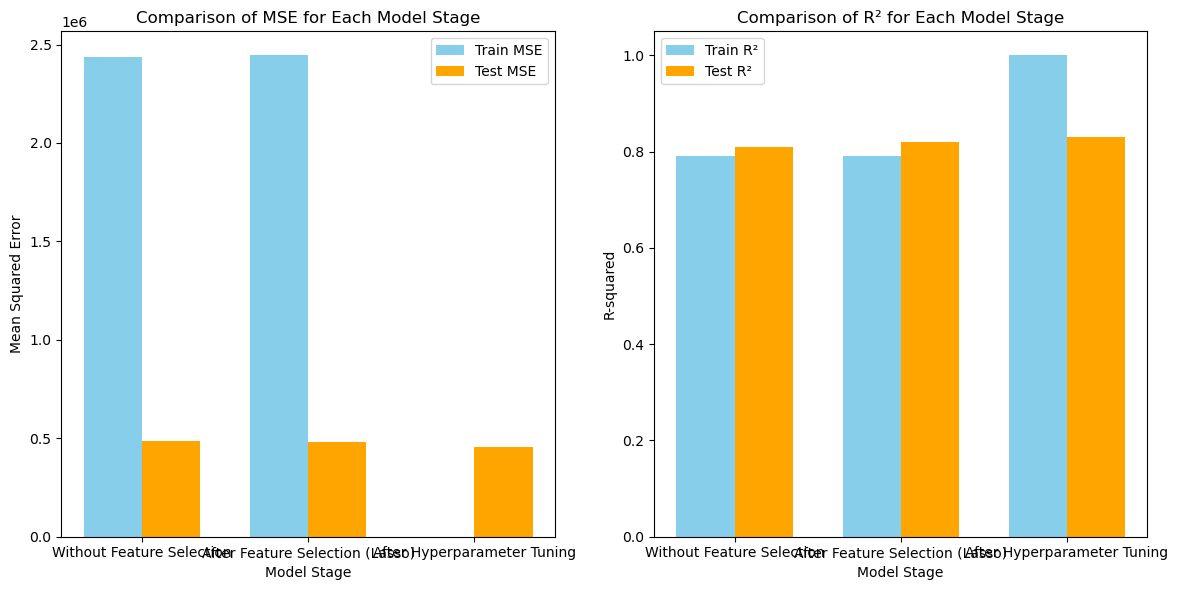

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Data for visualization (replace with actual values)
stages = ["Without Feature Selection", "After Feature Selection (Lasso)", "After Hyperparameter Tuning"]
train_mse = [2437784.33, 2444938.88, 0]  # Example values
test_mse = [486828.85, 479995.23, 454341.28]
train_r2 = [0.79, 0.79, 1.00]  # Example values
test_r2 = [0.81, 0.82, 0.83]

# Plot settings
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Create two subplots

# Bar Plot for MSE
x = np.arange(len(stages))  # the label locations
width = 0.35  # the width of the bars

ax1.bar(x - width/2, train_mse, width, label='Train MSE', color='skyblue')
ax1.bar(x + width/2, test_mse, width, label='Test MSE', color='orange')

ax1.set_xlabel('Model Stage')
ax1.set_ylabel('Mean Squared Error')
ax1.set_title('Comparison of MSE for Each Model Stage')
ax1.set_xticks(x)
ax1.set_xticklabels(stages)
ax1.legend()

# Bar Plot for R-squared
ax2.bar(x - width/2, train_r2, width, label='Train R²', color='skyblue')
ax2.bar(x + width/2, test_r2, width, label='Test R²', color='orange')

ax2.set_xlabel('Model Stage')
ax2.set_ylabel('R-squared')
ax2.set_title('Comparison of R² for Each Model Stage')
ax2.set_xticks(x)
ax2.set_xticklabels(stages)
ax2.legend()

# Display the plots
plt.tight_layout()
plt.show()
